# Sequential Monte Carlo-based mobility tracking in cellular networks

In [30]:
include("motion_model.jl")
using MAT 
using DataFrames

## A Hidden Markov Model for Mobility Tracking
### Problem 1

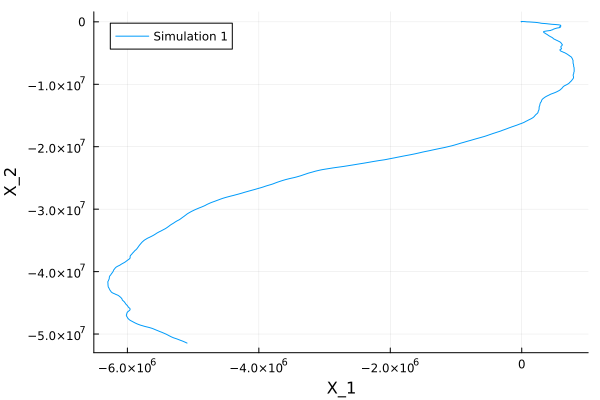

In [31]:
Random.seed!(80085)
simulations = simulate(1, 100000)
plot(simulations[1, :, 1], simulations[1, :, 4],xlabel="X_1", ylabel="X_2", label="Simulation 1")

## Mobility Tracking Using SMC Methods
### Problem 3

Notice how the algorithm breaks down because $1 / \omega \rightarrow \infty$

In [32]:
y = matread("RSSI-measurements.mat")["Y"] # SMatrix bad for large arrays
station_positions = SMatrix{2, 6}(matread("stations.mat")["pos_vec"])
n_particles = 1000
stop_time = size(y, 2) # number of time steps
estimated_movement = sis(y, n_particles, stop_time, station_positions, 1.5^2)

501×6 Matrix{Float64}:
  1.09311   -0.172593   -0.0906444    -0.539043  -0.0666484   0.132888
  1.47831   -0.193266   -0.0450735     0.413339   0.0309782   0.0780166
 -0.61648   -0.225224   -0.0213156    -0.310763   0.0624524   0.0652328
 -0.440551  -0.186924   -0.0281931    -0.344386   0.0516666   0.0404964
  2.27573    0.0118135  -0.0152161     0.606479   0.111852    0.0181212
  3.36156    0.0905938   0.00896584    2.27845    0.313753    0.0120858
  3.28736    0.0411079  -0.00128066    4.81096    0.764769    0.0121445
  4.9328     0.26851    -0.00772676    5.39348    0.819753    0.000753384
  3.77459    0.118471   -0.0311209     2.7258     0.0746622  -0.00835703
  2.05893   -0.19982     0.000170466   3.82589    0.327298   -0.00836243
  ⋮                                                           ⋮
  0.0        0.0         0.0           0.0        0.0         0.0
  0.0        0.0         0.0           0.0        0.0         0.0
  0.0        0.0         0.0           0.0        0.0     

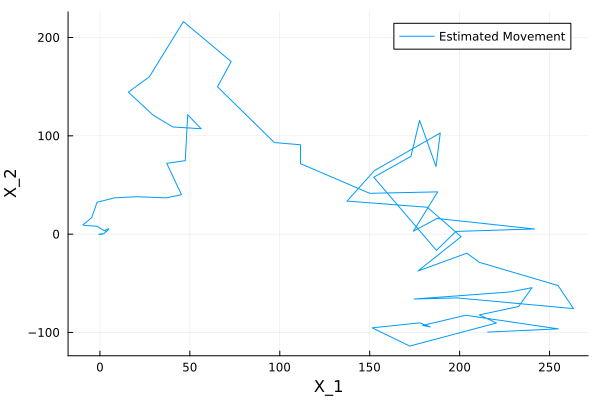

In [33]:
plot(estimated_movement[:, 1], estimated_movement[:, 4], xlabel="X_1", ylabel="X_2", label="Estimated Movement")

### Problem 4

In [34]:
n_particles = 1000
stop_time = size(y, 2) # number of time steps
estimated_movement_sisr = sisr(y, n_particles, stop_time, station_positions, [(x, t) -> x],[6], 1.5^2)[1]

u better work sisr <3 100%|██████████████████████████████| Time: 0:00:00


501×6 Matrix{Float64}:
    1.64945    -0.0357477  -0.0684016       0.34106   -0.140147   -0.0940119
    2.63605    -0.0205213  -0.0816067       1.29786   -0.0615     -0.104738
    0.440712   -0.163518   -0.104994        0.745139  -0.156705   -0.0209588
    0.202108   -0.228035   -0.0432505       0.860382  -0.092835    0.0421299
    2.54315    -0.0204353   0.0345418       1.63248    0.0827847   0.0572188
    2.46129     0.027054    0.0300867       3.00836    0.365579    0.0151202
    2.05876     0.0521728   0.052588        4.49727    0.602401    0.0429281
    3.51922     0.11227     0.00391479      3.70765    0.485423    0.0291185
    3.28325    -0.0012729  -0.0296284       0.940562  -0.244587   -6.70409e-5
    0.831695   -0.270348    0.00323466      2.83657    0.053038    0.012283
    ⋮                                                              ⋮
 1360.75      -28.5316     -0.0510151    1798.97      57.1918      0.0526796
 1329.05      -31.2814     -0.0578161    1825.06      57.6136 

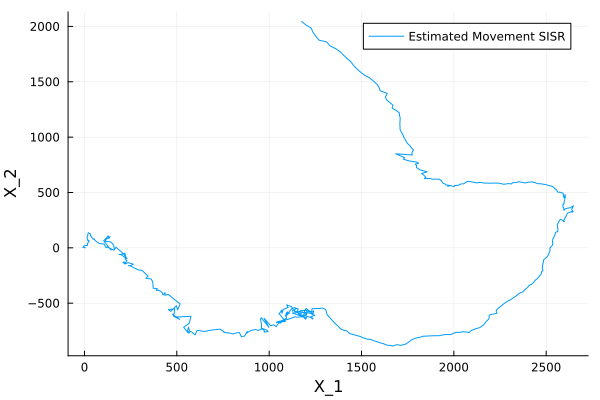

In [35]:
plot(estimated_movement_sisr[:, 1], estimated_movement_sisr[:, 4], xlabel="X_1", ylabel="X_2", label="Estimated Movement SISR")

## Problem 5

Grid searching <3 100%|██████████████████████████████████| Time: 0:04:34


[-151.3608974637371 -207.94691704980642 -80.86639945644704 -41.71142410548608 -54.161289874295434 -117.54469747972587 -121.93347908440356 -243.99035578551852 -134.27600255780732 -208.0018042849387 -47.997568794808686 -20.279110099822418 -53.88324769419611 -215.5724452057396 -28.82173706375824 -150.3099803131506 -48.72853926980847 -273.95790988374034 -151.5569319813063 -62.69349041946828 -50.76636031265219 -106.02206685623374 -78.98575966233294 -99.24060325677287 -68.65735452183031 -309.5947114607245 -309.2872740420597 -121.48885095673864 -104.87108104871446 -228.77249867932275 -114.30245248935498 -20.118985316370342 -317.2336324728241 -330.28708451638585 -61.14896282223968 -203.29796368537922 -106.45022959781089 -229.44104969445718 -60.68673225648054 -290.8147742909086 -96.29009475692835 -77.17578901593872 -43.080441869637454 -110.45851682141348 -153.2238671706827 -202.7520776857899 -227.79274094124708 -226.64314605862262 -77.15377528889658 -81.55837278123622 -142.37179093070714 -39.61

Excessive output truncated after 524307 bytes.

-25.743456984395102 -53.24711129782512 -236.26931165606473 -64.18426809587011 -21.53763808044317 -111.52548007840481 -101.23959581106087 -91.71404024270974 -50.766665318815875 -34.673687715475936 -157.78250870816223 -25.60910494096846 -52.90860048019278 -76.75615801550575 -41.66268368662099 -86.50870719300269 -69.46021244789256 -71.02976465735509 -31.315446584567347 -98.29704972828479 -33.150034441059 -59.594392576537665 -37.53484527673705 -53.719690086726146 -75.36022850857678 -42.65334317419296 -121.44261083322577 -94.47641033812428 -83.58206243769087 -145.98392940858886 -46.49751213440334 -28.84909844766776 -61.63175145357069 -50.928703475410266 -245.05293050672915 -163.62148373889178 -110.93796619305284 -94.20274270796988 -60.78340731260623 -37.81710274045778 -98.90289742879052 -28.052695058877 -43.47199445478998 -55.09166274607638 -89.81087323405708 -77.13717775388935 -108.27365716722309 -40.817705384307416 -16.953825033039838 -28.350934947131517 -111.54467485485745 -146.708522103

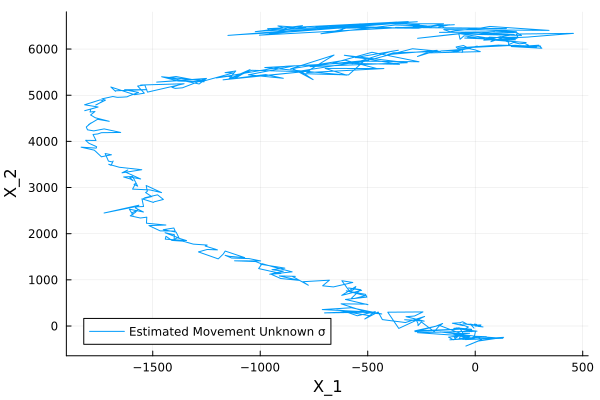

In [ ]:
y_unknown_ς = matread("RSSI-measurements-unknown-sigma.mat")["Y"] # SMatrix bad for large arrays
ς_grid = 3 .^ range(-1, 1, length=100)
n_particles = 10000
stop_time = size(y, 2) # number of time steps

ς_estimate, estimated_movement_unknown_ς = ς_grid_search(y_unknown_ς, n_particles, stop_time, station_positions, ς_grid)
plot(estimated_movement_unknown_ς[:, 1], estimated_movement_unknown_ς[:, 4], xlabel="X_1", ylabel="X_2", label="Estimated Movement Unknown ς")


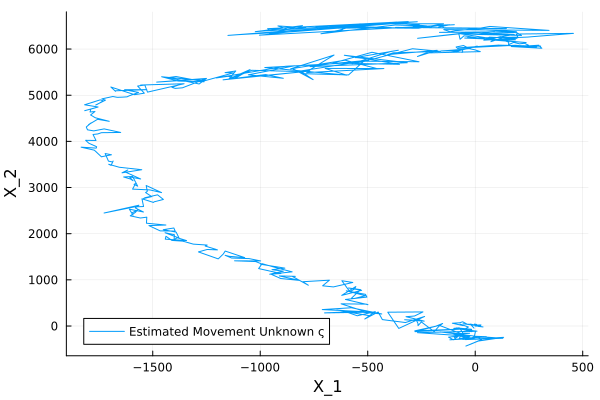

In [39]:
plot(estimated_movement_unknown_ς[:, 1], estimated_movement_unknown_ς[:, 4], xlabel="X_1", ylabel="X_2", label="Estimated Movement Unknown ς")
